In [3]:
import pandas as pd
import numpy as np

/Users/Kevin/opt/anaconda3/envs/cmpinf0010/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/Kevin/opt/anaconda3/envs/cmpinf0010/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/Kevin/opt/anaconda3/envs/cmpinf0010/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be se

<AxesSubplot:>

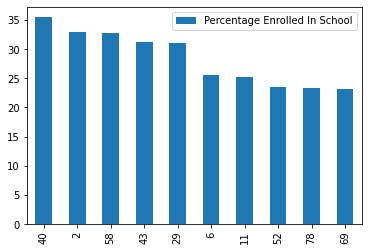

In [19]:
# Import raw dataset
enrollment_data_raw = pd.read_csv("Enrollment-Data.csv")
# Pull columns needed for operations
enrollment_data_edit = enrollment_data_raw[["Neighborhood","Estimate; Total:","Estimate; Enrolled in school:",\
                                            "Estimate; Enrolled in school: - Enrolled in college, undergraduate years",\
                                            "Estimate; Enrolled in school: - Graduate or professional school"]]

# Editing the columns so the total and total enrolled does not include college students
enrollment_data_edit["Enrolled In College"] = enrollment_data_raw["Estimate; Enrolled in school: - Enrolled in college, undergraduate years"] + enrollment_data_raw["Estimate; Enrolled in school: - Graduate or professional school"]
enrollment_data_edit["Total"] = enrollment_data_edit["Estimate; Total:"] - enrollment_data_edit["Enrolled In College"]
enrollment_data_edit["Total Enrolled"] = enrollment_data_edit["Estimate; Enrolled in school:"] - enrollment_data_edit["Enrolled In College"]

# Creating a final data set with only the data needed and adding a column with the percentage enrolled
enrollment_data = enrollment_data_edit[["Neighborhood","Total","Total Enrolled"]]
enrollment_data["Percentage Enrolled In School"] = (enrollment_data["Total Enrolled"] / enrollment_data["Total"])*100
enrollment_data = enrollment_data[["Neighborhood", "Percentage Enrolled In School"]]

#Sorting the values by percentage enrolled and plotting the top ten on a bar graph
enrollment_data.sort_values(by = "Percentage Enrolled In School", ascending = False, inplace = True)
enrollment_data[["Neighborhood","Percentage Enrolled In School"]].head(10).plot.bar()